This Jupyter notebook has two purposes. First, to parse all the open codes in PDF versions of computational notebooks located in the `notebooks` direction into a Pandas Data Frame and export that table as `codes.csv`. This is accomplished in the `parseCodes` First, the [Displace Codes](#Display-Codes) section displays the taxonomy represented in `code_tree.yaml` in a human-readable format. Second, the [Quality Control](#Quality-Control) section parses all the open codes in the PDF version of computational notebooks, scattered in the `notebooks` directory and identifies any difference in this set of codes and those manually written into `code_tree.yaml`.

In [12]:
import re, yaml
import pandas as pd
from IPython.display import display, Markdown
from lib.util import getCodes
import altair as alt

%autosave 0

pd.set_option("display.max_rows", None)  # Don't truncate rows when printing a Pandas DataFrame instance

alt.renderers.enable('notebook')

Autosave disabled


RendererRegistry.enable('notebook')

# Get codes

In [2]:
with open('code_tree.yaml', 'r') as f:
    code_yaml = yaml.safe_load(f)
    
codes = []

def preTreeWalk(pNode, node, func, lvl=0):
    """ A recursive, pre-order traversal of the code groups YAML structure"""
    func(pNode, node, lvl)
    if 'sub' in node.keys():
        for child in node['sub']:
            preTreeWalk(node, child, func, lvl + 1)

parseYaml = lambda parent, child, lvl: codes.append({
    'parent': parent['name'],    
    'name': child['name'],
    'desc': child['desc'],
    'level': lvl
})

for grp in code_yaml:
    preTreeWalk({'name': 'root'}, grp, parseYaml)

codes = pd.DataFrame(codes)
codes.head()

,desc,level,name,parent
0,Codes that describe actions the journalist has...,0,actions,root
1,Codes describing how data is imported into the...,1,import,actions
2,Data is imported via download from an external...,2,grab,import
3,"Using a table extraction tool, such as Tabula,...",3,pull tables out of pdf,grab
4,Systematically parsing web pages for relevant ...,3,scrape web for data,grab


# Display Codes

All open codes, their descriptions, and the corresponding axial codes are stored in the `code_tree.yaml` file. As the master copy for all open and axial codes resides in the `code_tree.yaml` file, the raw text itself can be difficult to read. Thus, this snippet renders all the codes in Markdown.

In [3]:
codeMarkdownTree = [ '{}* **{}**: {}\n'.format('\t' * c['level'], c['name'].title(), c['desc']) for i, c in codes.iterrows() ]

display(Markdown("""
### Codes\n {}
""".format('\n'.join(codeMarkdownTree))))


### Codes
 * **Actions**: Codes that describe actions the journalist has taken to wrangle data for further analysis

	* **Import**: Codes describing how data is imported into the programming environment.

		* **Grab**: Data is imported via download from an external source

			* **Pull Tables Out Of Pdf**: Using a table extraction tool, such as Tabula, to parse tables inside PDF documents.

			* **Scrape Web For Data**: Systematically parsing web pages for relevant data

			* **Geocode Addresses**: Translate addresses to latitude-longitude coordinates through web service, such as those from Bing.

			* **Query Database**: Data is imported through a database query

		* **Create**: Data is created inside the programming environment

			* **Construct Table Manually**: Using tables where column names and table values were either copy-and-pasted or entered manually.

			* **Generate Data Computationally**: Using tables populated programmatically.

			* **Copy Table Schema**: A table is copied without any values but table column names and type identical, or nearly identical, to another table

			* **Backfill Missing Data**: Create data observations where there are missing entries.

		* **Load**: Refers to importing files from disk as a table in the environment. Files can be .csv, .xlsx, .fec, and .shp, .RData

	* **Amend**: *Amending* a table constitutes creating new columns in the table without *integrating* other tables.

		* **Detrend**: "filter out the secular effect in order to see what is going on specifically with the phenomenon you are investigating," Philip Meyer in *Precision Journalism*.

			* **Adjust For Inflation**: TK

			* **Compute Index Number**: TK

		* **Encode Table Identification In Row**: When some way of identifying the table is encoded as a separate column in each row. Common identification methods include the name of the corresponding file, an arbitrary table name, or boolean value.

		* **Support Network Analysis**: Actions that modify a table to directly support network analysis

			* **Create Edge**: A column with value that define a relationship to another row, which is not necessarily in a different table.

			* **Define Edge Weights**: Columns that define edge weights

		* **Formulate Performance Metric**: Codes in this category specify a calculation that is later used to compare different entities or the same entity over time. A recurring theme between many of these notebooks is to compare different entities, such as political parties, by a common, quantitative metric, such as percentage of all newly registered voters.

			* **Calculate Standardized Score**: Measuring deviation from some definition of "normal."

				* **Calculate Z-Score**: Calculate how many standard deviations a value in a column is away from the mean. Journalists perform this function to simply find outliers in a dataset or when preparing the data for principal component analysis.

			* **Calculate Normalized Score**: Measuring the differences between groups of different sizes.

				* **Calculate Ratio**: Dividing a quantitative variable by another in such a way that enables fair comparisons. Such as per capita

				* **Calculate Scaled Ratio**: For example, calculating per 1,000 rates and percentages.

			* **Calculate The Central Tendency**: Measuring what a typical value is in the data.

				* **Calculate Mean**: The average of a set of numbers.

				* **Calculate Median**: The middle value in a range of numbers.

			* **Calculate Change**: Measuring how much things change, usually over time.

				* **Calculate Percentage Difference**: "the difference between two values taken as a percentage of whichever value you are using as the base," according to Philip Meyer in *Precision Journalism.* This term is synonymous with percent change.

				* **Calculate Difference**: Subtracting two quantitative variables, including scalar values, vectors, and matrices.

		* **Key Generation**: Operations that create "key" columns.

			* **Create A Semi-Unique Key**: Journalist creates a key that is a close, but imperfect, unique key, e.g. concatenating first name and surname.

			* **Create A Unique Key**: Journalist create a key that is actually unique in the table

			* **Concatenate Columns Into Key**: Combine two string columns into one to create a key, e.g. combine city and state.

			* **Designate Column As Primary Key**: Designating a column as the unique identifier for all rows in the table.

		* **Rank Data**: Operations that encode semantic meaning about the data with table index.

			* **Assign Ranks**: When a column of numerical ranks is explicitly assigned to rows in the table.

			* **Break Ties**: When the user specifies a way of breaking ties

			* **Sort Table**: When rank is implicitly assigned by rearranging row position in the table.

		* **Create Flag**: Flags are boolean expressed computed upon column values and used in filtering and grouping

	* **Clean**: Operations to correct erroneous or remove otherwise unwanted rows and values from the table.

		* **Trim Fat**: Winnow down data that is not relevant to analysis.

			* **Winnow Columns**: Simply put, these operations remove table columns.

				* **Subset Columns**: Removing columns from a table by specifying which ones to remove or keep.

				* **Align Table Columns For Consolidation**: Dropping columns so that the table can be row-wise concatenated with another table

			* **Winnow Rows**: Simply put, these operations remove table rows.

				* **Trim By Date Range**: Removing rows that are inside or outside a specific date range. This can be a method for detrending data by adjusting for season.

				* **Trim By Geographic Area**: Remove rows that are inside or outside the geographic area.

				* **Trim By Quantitative Threshold**: Remove rows that are above, below, equal to, or not equal to a numeric value.

				* **Trim By Contains Value**: Remove rows that do or do not contain specific values or types of values.

			* **Remove Incomplete Data**: Drop row if value(s) are incomplete, usually denoted as NA.

			* **Drop Erroneous Rows**: Remove rows that have any number of kinds of errors in them.

			* **Deduplicate**: Remove rows from the table that contain two or more of the same "observation." Duplicates may constitute rows with identical values in all, one, or zero columns.

				* **Drop Duplicate Rows Based On Prior Knowledge**: Drop row based on prior, possibly dataset-specific, knowledge about this dataset, such as "Master Records."

				* **Drop Duplicate Rows Based On Values**: Drop row if one or more column values exactly matches all, or some, the same column values of another row.

		* **Edit**: Operations that modify table values

			* **Edit Table Values**: Directly editing values within a column

				* **Fix Data Errors Manually**: Instances where individual row-column values are changed by a journalist.

				* **Remove Value Characters**: When characters inside a value are removed, such as periods, commas, dollar signs, etc

				* **Replace Na Values**: Raw data may contain incomplete table values (denoted as NA) or empty values (denoted as NULL)

			* **Map Column Values**: Edit operations that change all values within a column

				* **Translate Entity Names**: Performing a one-to-one mapping between values.

					* **Translate Entity Names Manually**: Manually specify the mapping between individual

					* **Pad Column Values**: Adding either character prefixes or suffixes consistently to every row within a column

					* **Strip Whitespace**: Removing extra whitespace characters from entity name

					* **Scale Values**: Operations that apply some mathematical operation to columns of quantitative data. This code is different from the codes under **Formulate performance metric** because this closer to cleaning.

						* **Transform Vector**: Apply a transformation to a vector, such as scalar multiplication

						* **Whiten Matrix**: Divide each feature by its standard deviation across all observations to give it unit variance.

				* **Combine Values**: Codes that map a set of entities to a smaller set of entities

					* **Rollup**: Rename entity to the name of its parent (for hierarchical data)

					* **Combine Entities Manually**: Manually specify rules for combining entities.

					* **Bin Values**: Classifying quantitative data into ordinal data.

					* **Resolve By Substring**: Taking a substring of each entity expecting that a shorter version will combine some entities.

					* **Resolve Entity Names**: Reconcile different names for the same entity.

						* **Perform Entity Resolution Manually**: Manually specifying the mapping between categorical values, not changing individual rows.

						* **Resolve To Arbitrary Entity Name Among Choices**: The actual text of the entity is not necessary as import as uniqueness

		* **Format**: Operations that modify the table values appearance or style

			* **Format Values**: Operations that modify the values within the table

				* **Change Case**: Change the case of string values

				* **Change Date Format**: Specify the format which dates should be displayed

				* **Round Floating Point**: Round floating point numbers

				* **Correct Bad Formatting**: Changes that correct ill-formed data such as HTML entities and new lines (\n)

			* **Format Schema**: Operations that modify anything except table values

				* **Canonicalize Column Names**: Operations that change column names

				* **Change Column Data Type**: For example, changing a column of values from strings to integers

			* **Sort Table Rows**: Sorting a table in a way that does not rank rows, such as by a unique identifier

		* **Separate**: Mapping one column into more than one because multiple dimensions of the dataset packed into one column

			* **Extract Property From Datetime**: Such as extracting the day of the month, year, etc.. from a datetime column

			* **Slice Column Values**: Extracting the relevant column values by character position, e.g. the first five digits of a zip code

			* **Split Column On Delimiter**: Separate data dimensions by a common character, e.g. lat-long coordinates separated by a comma

			* **Get Unique Values**: TK

		* **Combine Columns**: Combining two columns into one

	* **Integrate**: Combining data residing in different tables into one table.

		* **Consolidate**: Consolidation is characterized by actions that add essentially combine rows of two tables.

			* **Union Tables**: TK

			* **Concatenate Files Together**: TK

		* **Intersect**: Joining two tables such that non-matching rows are excluded from the combined table.

			* **Inner Join Tables**: TK

		* **Supplement**: Supplementation is characterized by integration operations that essentially add columns to existing data

			* **Outer Join Tables**: A join that returns rows with no corresponding match in the table being joined two, e.g. left or right joins.

			* **Full Join Tables**: Combine all rows and all columns of the two tables. a.k.a full outer join

			* **Compute An Inter-Table Column**: When a table uses a column from a *parallel* table (like arrays) to compute a new column.

			* **Concat Parallel Tables**: When columns from multiple, parallel tables are concatenated together to form a new table.

			* **Self Join Table**: Join a table with itself

			* **Join With Lookup Table**: Two column tables meant for mapping a key from one table to the unique column in the lookup table.

		* **Other**: Integration operations that do not fall into the other categories

			* **Cartesian Product**: TK

	* **Transform**: Operations that transform a table into an aggregated, lower-resolution view of the original table.

		* **Summarize**: Codes that aggregate and calculate tables to get a more coarse view of the data.

			* **Join Aggregate**: "extends the input data objects with aggregate values in a new field" - Vega-Lite Join Aggregate docs.

			* **Group**: Codes that group the table along one or more table dimension.

				* **Single Dimensional Group By**: Grouping one or more columns such that grouped columns are hierarchically ordered when grouping by two or more columns. This operation is commonly implemented with `groupby` in Pandas.

					* **Group By Single Column**: When a table is grouped by a single column.

					* **Group By Multiple Columns**: When a table is grouped by multiple columns, creating hierarchy.

					* **Create Lookup Table**: Creating a table with two columns that serves as a map from one value to another.

				* **Group By Double Axis**: Grouping by more than one column such that one grouped column is not hierarchically paired with another grouped column.

					* **Construct Pivot Table**: Is essentially the same as a crosstab except that the table axes may contain hierarchical, nominal data.

					* **Create A Crosstab**: User performs a crosstab query, as defined by [Microsoft Office](https://support.office.com/en-us/article/make-summary-data-easier-to-read-by-using-a-crosstab-query-8465b89c-2ff2-4cc8-ba60-2cd8484667e8). Crosstabs are very similar to the reshaping operation *spread*, except that they summarize values using aggregate functions.

				* **Create Rolling Window**: Performs rolling-window aggregation

		* **Calculate**: These are within-column calculations that often, but not always, immediately follow an *aggregation* operation.

			* **Sum Along Dimension**: Calculate the sum of all values within a row or column

			* **Get Extreme Values**: Calculate the highest or lowest value(s)

			* **Count Value Frequency**: Count the frequency of categorical variables within a column

			* **Count Unique Values In Column**: Produces a scalar with unique values in the column.

		* **Reshape**: Operations fundamentally change the table's structure, but do not perform any kind of summarization calculation. *Constructing a pivot table* often involves a *spread-like* operation when defining what values to use as columns in the new table. The difference with *reshaping* is that sometimes the journalist may not summarize the reshaped table.

			* **Spread Table**: Expand two columns of key value pairs into multiple columns.

			* **Gather Table**: Collapses table into key value pairs.

	* **Display Dataset**: Different ways to check in on the state of the dataset during wrangling.

		* **Display A Table**: Operations that have to do with displaying the raw data as a table.

			* **Format Table Display**: Operations that adjust the table displace, such as how many decimals to round floats

		* **Understand Distribution**: Operations that reveal something of the underlying distribution of data.

			* **Visualize Data**: Employing any kind of data visualization, including a table

	* **Check Sanity**: Operations that confirm the effect of a previous wrangling operation.

		* **Run A Test**: Operations output a clear pass or fail value, often implemented by counting things

			* **Report Rows With Column Number Discrepancies**: Finds if a row has a different number of columns than the header row

			* **Test For Equality**: Test if two data structures are exactly the same, e.g. two data frames

			* **Test Different Computations For Equality**: Test the results of a calculation against different methods/packages. The Upshot did this with variance.

		* **Check Results**: Operations that output some visual representation of the table

			* **Check Results Of Previous Operation**: 

			* **Peek At Data**: Display the first *n* rows and all columns of the table

			* **Inspect Table Schema**: Check the data types of columns

			* **Display Rows With Missing Values**: E.g. filtering rows with a NA value in a particular column

			* **Check For Nas**: See if any rows have NA values.

			* **Count Number Of Rows**: Printing out the total number of rows in a table

	* **Export Data**: Ways in which journalist export the results of their data wrangling.

		* **Export Intermediate Results**: 

		* **Export Results**: 

* **Observations**: These codes cover observations from the coder about the wrangling processes, not actions performed by the journalist.

	* **Data Acquisition**: How the data was acquired by journalists

		* **Collect Raw Data**: Using first-hand observations or logs as data.

		* **Use Previously Cleaned Data**: Data that originated from a colleague.

		* **Use Public Data**: Includes open-source datasets, tables on Wikipedia, etc..

		* **Use Academic Data**: 

		* **Use Non-Public, Provided Data**: 

		* **Use Open Government Data**: Data publically available on open data portals, such as data.gov

		* **Freedom Of Information Data**: Data that was obtained via FOI/FOIA requests.

		* **Use Another News Orgs Data**: A dataset previously published by another news organization

		* **Use Data From Colleague**: A dataset was provided by another journalist.

	* **Workflow Building**: Codes pertaining to how the wrangling workflow is built.

		* **Cache Results From External Service**: When results from an API call are cached in disk.

		* **Annotate Workflow**: Adding comments or notes in Markdown that explain what the journalists doing.

		* **Think Computationally**: Codes that demonstrate computational thinking on the part of the journalist.

			* **Architect A Subroutine**: A set of instructions grouped together to be performed multiple times.

			* **Architect Repeating Process**: Instances where journalists employed a loop.

		* **Toggle Step On And Off**: Some wrangling steps were not always run. Toggling off is often accomplished by commenting out code.

	* **Wrangling Purpose**: Why does this data need to be wrangled?

		* **Input For Downstream Applications**: Output from wrangling will be input into some other program

			* **Wrangle Data For Graphics**: Data need to be formatted in order to be visualized in an article, including tables.

			* **Wrangle Data For Model**: Data is being wrangled in order to create a model, whether the main point of the piece is for prediction or classification

		* **Combine Drifting Datasets**: Reconcile difference in periodically published datasets that have superficially changed over time, such as schema differences or entity names, to consolidate more than one dataset.

		* **Combine Seemingly Disparate Datasets**: When a notebook largely constitutes combining seemingly unrelated datasets.

		* **Combine Data And Geography**: Pairing data with GIS info.

		* **Aggregate The Forest From The Trees**: Data of individual observations is aggregated in an attempt to find some meaningful structure or patterns

	* **Analysis**: Kinds of analysis data journalists need to wrangle data to perform.

		* **Interpret Statistical/Ml Model**: Analyze features from a model such as linear regression or classification trees

		* **Compare Different Groups Along A Common Metric**: The end analysis is just comparing different groups by a common metric.

		* **Show Trend Over Time**: Analysis consists of showing how values change over time

		* **Calculate A Statistic**: Calculate a single value for from a dataset, such as number of records.

		* **Explain Variance**: This can be done via PCA

		* **Answer A Question**: Analysis consists of using data to answer a specific question

		* **Outlier Detection**: Finding extreme cases or outliers in the data

		* **Find Nearest Neighbours In The Network**: (Network analysis) Find the closest neighbours for all points

		* **Explore Dynamic Network Flow**: (Network analysis) explore the flow between different nodes in the graph, e.g. migration between cities.

	* **Strategies**: General strategies journalists employ when wrangling data.

		* **Tables Evolve**: Data and objects are destroyed during the wrangling process.

			* **Value Replacement**: The output of any column calculation is reassigned to an existing column.

			* **Temporary Joining Column**: When a key for joining two tables is created and destroyed immediately after the join.

			* **Refine Table**: Table refinement refers to when a table is subset *in place*, a new object is not created in the environment.

		* **Data Is Precious**: Data and objects are neverly actually lost in the programming environment.

			* **Preserve Existing Values**: The output of any column calculation is assigned to a new column

			* **Create Child Table**: A child table is a subset of the parent table declared as a new object in the environment.

		* **Set Data Confidence Threshold**: Removes rows where a quantitative value is less than, greater than, or not equal to a numeric value.

		* **Table Splitting**: Tables may be divided, partitioned, or otherwise split into multiple tables to accomplish a transformation goal.

			* **Split, Compute, And Merge**: First, the journalist partitions a single data frame into multiple, separate data frames. Then, often identical computations are run on all the data frame. Finally, the multiple data frames are consolidated into one data frame again.

			* **Split And Compute**: One table is split into two or more and identical computations are applied to each table.

			* **Merge Tables To Create Pivot Table**: Create a pivot table through successive join commands

		* **Tolerate Dirty Data**: Analysis continues despite clear data quality issues.

	* **Pain Points**: Areas where journalist seem/could be frustrated in the wrangling process.

		* **Fix Incorrect Calculation**: Calculations in the data are incorrect and the journalist must recalculate them

		* **Repetitive Code**: Instances where code is repetitively copied and pasted.

		* **Make An Incorrect Conclusion**: Instances where the journalist has made an incorrect conclusion about the data.

		* **Post-Merge Clean Up**: Pain points that come from the result of merging two datasets together

			* **Resort After Merge**: When a sort has to be re-done because a merge ruining the pre-merged order.

			* **Fill In Na Values After An Outer Join**: As outer joins do not drop non-matching rows, those values have NA

		* **Encode Redundant Information**: When data that already exists in the table is recoded into the table.

		* **Post-Aggregation Clean Up**: Pain points that come from the result of grouping a table.

			* **Data Loss From Aggregation**: When table columns are lost because they were dropped form resulting table due to not being relevant in aggregation.

			* **Silently Dropping Values After Groupby**: Values other than thsoe being grouped and calculated upon are lost in a group by operation

		* **Data Too Large For Repo**: Raw data cannot be included in SCM because files are too large



# Quality Control

Open codes are extracted from each PDF using some internals of the open-source [pdfannots CLI](https://github.com/0xabu/pdfannots). See the [main function in pdfannots.py](https://github.com/0xabu/pdfannots/blob/6dd8dd29a93a0f5ec55e4b47f0eb27d8088a11a0/pdfannots.py#L469) for more details. The `getCodes` function is located in `lib/util.py`.

In [4]:
%%time
codeData = getCodes()

CPU times: user 1min 59s, sys: 280 ms, total: 2min
Wall time: 2min 1s


Double check that every code generated from open coding has been covered in `code_tree.yaml` and every entity in `code_tree.yaml` is actually in a `.html.pdf` file.

In [5]:
# Parse the code YAML for just the open codes (leaves)
leaves = []
def collectLeaves(node, repo):
    """Recursively traverse dictionary tree and collect only the leave nodes"""
    if 'sub' in node.keys():
        for subnode in node['sub']:
            collectLeaves(subnode, repo)
    else:
        safeCode = node['name'].strip().lower()
        repo.append(safeCode)

for grp in code_yaml:
    collectLeaves(grp, leaves)

# Convert from lists to sets
leaves = set(leaves)
pdf_codes = set(codeData['code'].unique())

# Find any discrepancies
diff = lambda a, b, codes: display(Markdown('Codes in `{}` but not in `{}`:\n{}\n'.format(a, b, '\n'.join(['* ' + c for c in codes]))))

falsePositives = pdf_codes.difference(leaves)
falseNegatives = leaves.difference(pdf_codes)

if not (bool(falsePositives) or bool(falseNegatives)):
    # Both sets are the null set
    display(Markdown('<p>All codes have been grouped!</p><img src="https://media.giphy.com/media/XreQmk7ETCak0/giphy.gif"> '))
else:
    # Problems
    if len(pdf_codes.difference(leaves)) > 0:
        diff('*.html.pdf', 'code_tree.yaml', pdf_codes.difference(leaves))
    if len(leaves.difference(pdf_codes)) > 0:
        diff('code_tree.yaml', '*.html.pdf', leaves.difference(pdf_codes))

Codes in `*.html.pdf` but not in `code_tree.yaml`:
* wtf


If extracted codes and the codes in `code_tree.yaml` don't match, then we can find the corresponding open code by grouping data by code, article, and analysis.

In [6]:
needles = ['remove with regular expression']

codeData[codeData.code.isin([n.lower() for n in needles ])] \
    .groupby(['code', 'article', 'analysis']) \
    ['analysis'].count() \
    .to_frame('count')

,,,count
code,article,analysis,


# Calculating code frequency

In [142]:
foo = codes.copy()
fooData = codeData.copy()

articleCodes = codes.loc[codes.level == max(codes.level)]copy()
articleCodes

# for i in foo.level.unique()[::-1]:
#     articleCodesTmp = pd.merge(foo[foo.level == i][['name', 'parent']],
#         fooData[['code', 'article']],
#         how='left', 
#         left_on='name',
#         right_on='code') \
#         [['parent', 'article']] \
#         .rename(columns={'parent': 'name'})
#     articleCodes = pd.concat([articleCodes, articleCodesTmp])

# articleCodes = articleCodes.drop_duplicates()

# articleCodes.groupby('name')['article'].nunique().to_frame('freq').reset_index()

,desc,level,name,parent,freq,is_leaf
0,Codes that describe actions the journalist has...,0,actions,root,457.0,False
1,Codes describing how data is imported into the...,1,import,actions,42.0,False
2,Data is imported via download from an external...,2,grab,import,5.0,False
3,"Using a table extraction tool, such as Tabula,...",3,pull tables out of pdf,grab,1.0,True
4,Systematically parsing web pages for relevant ...,3,scrape web for data,grab,2.0,True
5,Translate addresses to latitude-longitude coor...,3,geocode addresses,grab,1.0,True
6,Data is imported through a database query,3,query database,grab,1.0,True
7,Data is created inside the programming environ...,2,create,import,10.0,False
8,Using tables where column names and table valu...,3,construct table manually,create,5.0,True
9,Using tables populated programmatically.,3,generate data computationally,create,2.0,True


In [143]:
bins = [
    'rare',
    'seldom',
    'few',
    'some',
    'a lot',
    'most',
    'frequently',
    'nearly all',
    'a whole lot'
]

oneUpCodes = pd.merge(
        codes[codes.is_leaf][['name', 'parent']], 
        codeData[['code', 'article']], 
        how='left', 
        left_on='name', 
        right_on='code') \
    [['parent', 'article']] \
    .groupby('parent') \
    ['article'].nunique() \
    .to_frame('freq') \
    .reset_index() \
    .rename(columns={'parent': 'name'})

oneUpCodes['percent'] = oneUpCodes.freq / codeData.article.nunique()

oneUpCodes['prevalence'] = pd.cut(oneUpCodes.percent, len(bins), labels=bins)
#oneUpCodes.freq.cut
oneUpCodes.head()

,name,freq,percent,prevalence
0,amend,7,0.148936,few
1,analysis,27,0.574468,a whole lot
2,calculate,15,0.319149,a lot
3,calculate change,13,0.276596,a lot
4,calculate normalized score,13,0.276596,a lot


## Code prevalence by leaf-parent nodes

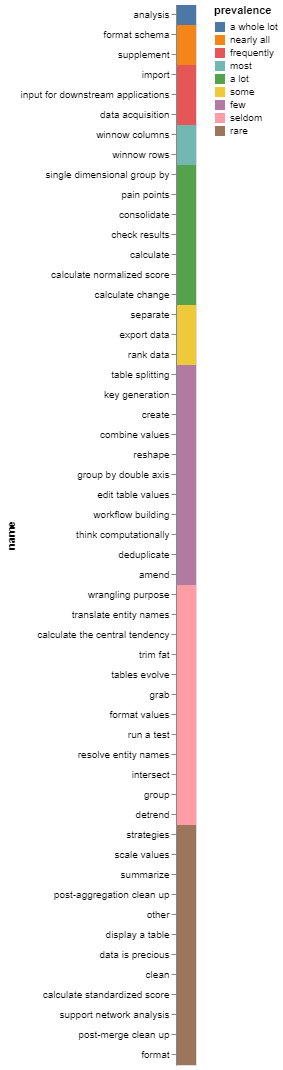

In [144]:
alt.Chart(data=oneUpCodes).mark_rect().encode(
    y = alt.Y(
        'name:N',
        sort = alt.EncodingSortField(
            field='percent',
            order='descending')
    ),
    color=alt.Color('prevalence:N', sort=bins[::-1])
)

In [10]:
## Code counting attempt

# # Get the frequency of each (leaf) code, per article, from the PDFs
# codeFreq = codeData.rename(columns={'code': 'name'}) \
#     .groupby('name') \
#     ['article'].count() \
#     .to_frame('freq') \
#     .reset_index()

# # Add axial codes
# codeFreq = pd.merge(codeFreq, codes[['name', 'desc']], how='right').fillna(0)

# codeFreq['is_leaf'] = False
# codeFreq.loc[codeFreq.freq > 0, 'is_leaf'] = True

# # Fill in axial codes with frequency counts of zero.

# def calcFreq(parent, child):
#     """"""
#     if parent['name'] != 'root':
#         childCount = int(codeFreq.loc[codeFreq.name == child['name'], 'freq'])
#         parentCount = int(codeFreq.loc[codeFreq.name == parent['name'], 'freq'])
#         codeFreq.loc[codeFreq.name == parent['name'], 'freq'] = parentCount + childCount

# def postTreeWalk(pNode, node, func):
#     """ A recursive, post-order traversal of the YAML code tree"""
#     if 'sub' in node.keys():
#         for child in node['sub']:
#             postTreeWalk(node, child, func)
#     func(pNode, node)

# for grp in code_yaml:
#     postTreeWalk({'name': 'root' }, grp, calcFreq)

# codeFreq.head()

,name,freq,desc,is_leaf
0,adjust for inflation,3.0,TK,True
1,aggregate the forest from the trees,2.0,Data of individual observations is aggregated ...,True
2,align table columns for consolidation,2.0,Dropping columns so that the table can be row-...,True
3,annotate workflow,6.0,Adding comments or notes in Markdown that expl...,True
4,answer a question,3.0,Analysis consists of using data to answer a sp...,True
5,architect a subroutine,6.0,A set of instructions grouped together to be p...,True
6,architect repeating process,3.0,Instances where journalists employed a loop.,True
7,assign ranks,1.0,When a column of numerical ranks is explicitly...,True
8,backfill missing data,2.0,Create data observations where there are missi...,True
9,bin values,3.0,Classifying quantitative data into ordinal data.,True


Join aggregate counts back to the `codes` data frame

In [8]:
# codes = pd.merge(codes, codeFreq, how='left')
# codes.head()

,desc,level,name,parent,freq,is_leaf
0,Codes that describe actions the journalist has...,0,actions,root,457.0,False
1,Codes describing how data is imported into the...,1,import,actions,42.0,False
2,Data is imported via download from an external...,2,grab,import,5.0,False
3,"Using a table extraction tool, such as Tabula,...",3,pull tables out of pdf,grab,1.0,True
4,Systematically parsing web pages for relevant ...,3,scrape web for data,grab,2.0,True


In [40]:
# leafParents = codes[codes.is_leaf == True].parent.unique()
# oneUpCodes = codes[codes.name.isin(leafParents)]  # Because they're one level above the leaves

# display(Markdown('Code frequency range is [{min}, {max}]'.format(**{
#     'min': min(oneUpCodes.freq), 
#     'max': max(oneUpCodes.freq)})))

Code frequency range is [1.0, 160.0]

In [47]:
topCodes = codes[codes.level == 1]
pd.cut(topCodes.freq, 7, labels=[''])

1      (24.571, 47.143]
13     (69.714, 92.286]
43     (137.429, 160.0]
95     (47.143, 69.714]
110    (47.143, 69.714]
130     (1.842, 24.571]
135    (24.571, 47.143]
147     (1.842, 24.571]
151     (1.842, 24.571]
161     (1.842, 24.571]
168    (24.571, 47.143]
176    (24.571, 47.143]
186    (24.571, 47.143]
200     (1.842, 24.571]
Name: freq, dtype: category
Categories (7, interval[float64]): [(1.842, 24.571] < (24.571, 47.143] < (47.143, 69.714] < (69.714, 92.286] < (92.286, 114.857] < (114.857, 137.429] < (137.429, 160.0]]

## Code frequency by level 1 codes

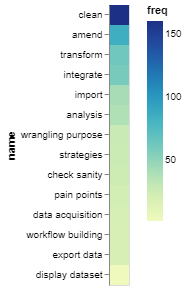

In [45]:
alt.Chart(data=topCodes).mark_rect().encode(
    y = alt.Y(
        'name:N',
        sort = alt.EncodingSortField(
            field='freq',
            order='descending')
    ),
    color='freq:Q'
)